## Adaboost Classifier

#### Ada-boost or Adaptive Boosting is one of ensemble boosting classifier. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.
It works in the following steps:

Initially, Adaboost selects a training subset randomly. 

It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.

It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.                                                                                       

Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.                                                                                   

This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.                                                                                                                

To classify, perform a "vote" across all of the learning algorithms you built.

#### First we import all the necessary libraries and the dataset. We are going to use Adaboost classifier to classify people with yearly income of less than or equal to 50k and people with yearly income of more than 50k in the adult_census_income dataset.

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [16]:
adult_df=pd.read_csv('C:/Users/Vivek/Downloads/adult_census_income.csv')
print(adult_df.shape)
adult_df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [18]:
adult_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

The observations from the dataset are as follows.                                                                               
age: continuous.<br>                                                                                                            workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.<br>        fnlwgt: continuous.<br>                                                                                                          education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>                                                                                  education-num: continuous.<br>                                                                                              marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br> occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>           relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>                                          race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>                                                          sex: Female, Male.<br>                                                                                                      capital-gain: continuous.<br>                                                                                               capital-loss: continuous.<br>                                                                                                 hours-per-week: continuous.<br>                                                                                                  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [19]:
pd.unique(adult_df['income'])

array(['<=50K', '>50K'], dtype=object)

In [20]:
#replace the income with integer that denotes its class
adult_df['income']=np.where(adult_df['income']== '>50K', 1, 0)

#### Since the income is in srring we will convert it into integer. If the income is greater than 50k then the value is 1 or else its 0

In [21]:
#Define  a function to visualize how different columns correlate with income
def hist_by(df, column):
    X,y=[],[]
    for value in sorted(df[column].unique()):
        X.append(value)
        y.append(df[df[column] == value]['income'].mean()*100.0)
    
    index=np.arange(len(X))
    width=0.35
    plt.bar(index, y, width)
    plt.xticks(index+width/2, X, rotation=70)
    plt.yticks(np.arange(0,100,10))
    plt.ylim(0,100)
    plt.xlabel(column)
    plt.ylabel('Percentage of people who\'s income is above 50K')
    plt.tight_layout
    plt.show()

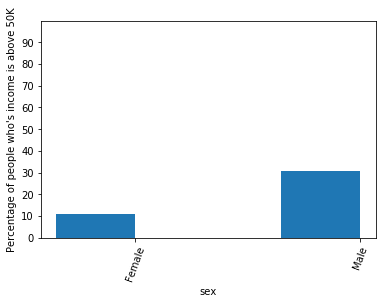

In [22]:
#Visualize how sex correlates with income
hist_by(adult_df,'sex')

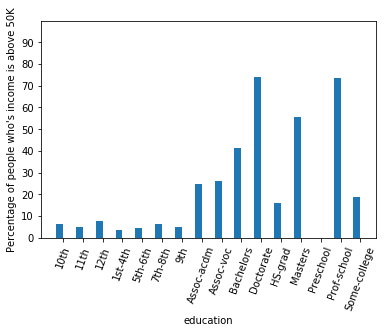

In [24]:
#Visualize how educational degree correlates with income
hist_by(adult_df,'education')

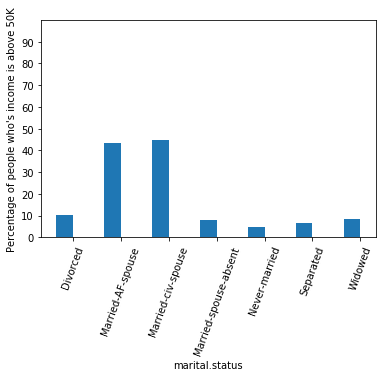

In [25]:
#Visualize how marital status correlates with income
hist_by(adult_df,'marital.status')

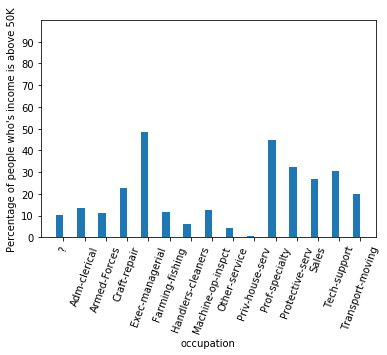

In [27]:
#Visualize how occupation correlates with income
hist_by(adult_df,'occupation')

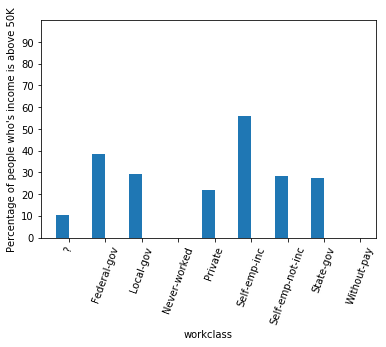

In [28]:
#Visualize how workclass correlates with income
hist_by(adult_df,'workclass')

In [29]:
#removing entries where occupation or workclass is unknown
adult_df=adult_df[adult_df['occupation']!='?']
adult_df=adult_df[adult_df['workclass']!='?']

In [30]:
#Get dummies
education_dummies=pd.get_dummies(adult_df['education'])
marital_dummies=pd.get_dummies(adult_df['marital.status'])
relationship_dummies=pd.get_dummies(adult_df['relationship'])
sex_dummies=pd.get_dummies(adult_df['sex'])
occupation_dummies=pd.get_dummies(adult_df['occupation'])
native_dummies=pd.get_dummies(adult_df['native.country'])
race_dummies=pd.get_dummies(adult_df['race'])
workclass_dummies=pd.get_dummies(adult_df['workclass'])

In [31]:
#example
marital_dummies.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0


In [38]:
#define a function to put the continuous values in bins
from string import ascii_uppercase
from string import ascii_lowercase
def into_bins(column,bins):
    group_names=list(ascii_uppercase[:len(bins)-1])
    binned=pd.cut(column,bins, labels=group_names)
    return binned

In [39]:
# lets see how capital loss varies
adult_df['capital.loss'].describe()

count    30718.000000
mean        88.910216
std        405.657203
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64

C:\Users\Vivek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Vivek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


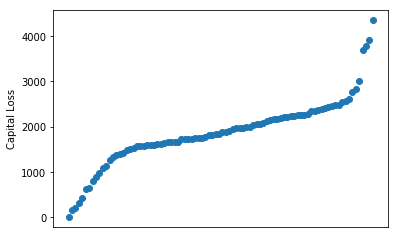

In [40]:
#Create scatter plot for all the unique values in capital.loss
#this will be helpful in visualizing how to assign bins to this feature
unique=sorted(adult_df['capital.loss'].unique())
plt.scatter(range(len(unique)), unique)
plt.ylabel('Capital Loss')
plt.tick_params(axis='x', which='both', labelbottom='off', bottom='off') #disable x ticks
plt.show()

In [41]:
#create bins from -1 to 4500 with 500 values in each bin
loss_bins = into_bins(adult_df['capital.loss'], list(range(-1, 4500, 500)))
loss_dummies=pd.get_dummies(loss_bins)
print(loss_bins)

1        I
3        H
4        H
5        H
6        H
7        H
8        H
9        G
10       G
11       F
12       F
13       F
15       F
16       F
17       F
18       F
19       F
20       F
21       F
22       F
23       F
25       F
26       F
27       F
28       F
29       F
30       F
31       F
32       F
33       F
        ..
32525    A
32526    A
32527    A
32529    A
32530    A
32531    A
32532    A
32535    A
32536    A
32537    A
32538    A
32539    A
32540    A
32542    A
32545    A
32546    A
32547    A
32548    A
32549    A
32550    A
32551    A
32552    A
32553    A
32554    A
32555    A
32556    A
32557    A
32558    A
32559    A
32560    A
Name: capital.loss, Length: 30718, dtype: category
Categories (9, object): [A < B < C < D ... F < G < H < I]


In [42]:
# lets see how capital gain varies
adult_df['capital.gain'].describe()

count    30718.000000
mean      1106.037079
std       7497.863364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64

C:\Users\Vivek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Vivek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


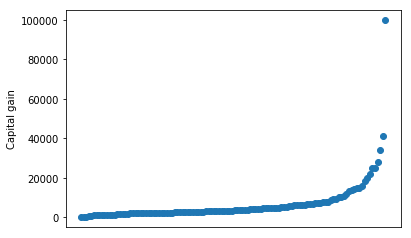

In [43]:
unique=sorted(adult_df['capital.gain'].unique())
plt.scatter(range(len(unique)), unique)
plt.ylabel('Capital gain')
plt.tick_params(axis='x', which='both', labelbottom='off', bottom='off') #disable x ticks
plt.show()

In [44]:
gain_bins = into_bins(adult_df['capital.gain'], list(range(-1, 4500, 500)))
gain_dummies=pd.get_dummies(gain_bins)

In [47]:
from sklearn.model_selection import train_test_split
#concatnate all the columns we need and the ones we generated by binning and creating dummies
X=pd.concat([adult_df[['age','hours.per.week']], gain_dummies, occupation_dummies, workclass_dummies, education_dummies, marital_dummies, race_dummies, sex_dummies],axis=1)
y=adult_df['income']

#create test and train sets
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.9, random_state=1)

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Applying the Adaboost classifier

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

#create classifier and fit the data
clf=AdaBoostClassifier(random_state=1)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=1)

In [49]:
#find accuracy using the test set
y_pred=clf.predict(X_test)
print('Accuracy:{}'.format(accuracy_score(y_pred, y_test)))

Accuracy:0.8408203125


In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2116  183]
 [ 306  467]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2299
           1       0.72      0.60      0.66       773

   micro avg       0.84      0.84      0.84      3072
   macro avg       0.80      0.76      0.78      3072
weighted avg       0.83      0.84      0.84      3072



#### As we can see the accuracy is 84% which is good.